In [26]:
import numpy as np
from tensorflow import keras
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [50]:
dir_names = ['nike1','adidas1','converse1']

# 전체 파일명
for name in dir_names:
    fileCount = 0

    for file in sorted(glob.glob("../ML_ImageData/original_images/%s/*.jpg"%name)):
        img = Image.open(file)
        imgArray = np.array(img,dtype=np.int32).reshape(128,128,3)
        
        img2 = Image.fromarray(imgArray.astype('uint8'))
        img2.save("../ML_ImageData/Shoes_Centered/%s/image_%04d.jpg"%(name[:-1],fileCount),'JPEG')
        fileCount+=1


In [51]:
dir_names = ['nike2','adidas2','converse2']

# 전체 파일명
for name in dir_names:
    fileCount = 60

    for file in sorted(glob.glob("../ML_ImageData/original_images/%s/*.jpg"%name)):
        img = Image.open(file)
        imgArray = np.array(img,dtype=np.int32).reshape(128,128,3)
        
        img2 = Image.fromarray(imgArray.astype('uint8'))
        img2.save("../ML_ImageData/Shoes_Centered/%s/image_%04d.jpg"%(name[:-1],fileCount),'JPEG')
        fileCount+=1


In [124]:
brand_names = ['nike','converse','adidas']

number_of_data = 120*len(brand_names)
img_width_size = 128
img_height_size = 128
channel = 3
train = np.zeros(number_of_data*img_height_size*img_width_size*channel, dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size,channel)

i = 0
for name in brand_names:
    for file in sorted(glob.glob("../ML_ImageData/Shoes_Centered/%s/*.jpg"%name)):
        img = np.array(Image.open(file),dtype=np.int32)
        train[i,:,:,:] = img
        i+=1
        if i >= 360:
            break


In [125]:
train.shape

(360, 128, 128, 3)

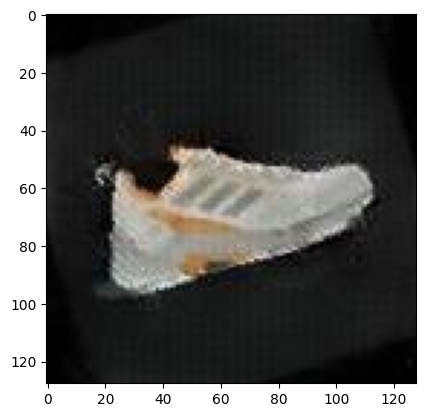

In [126]:
plt.imshow((train[240].reshape(128,128,3)))

[0, 120, 240]
0
120
240


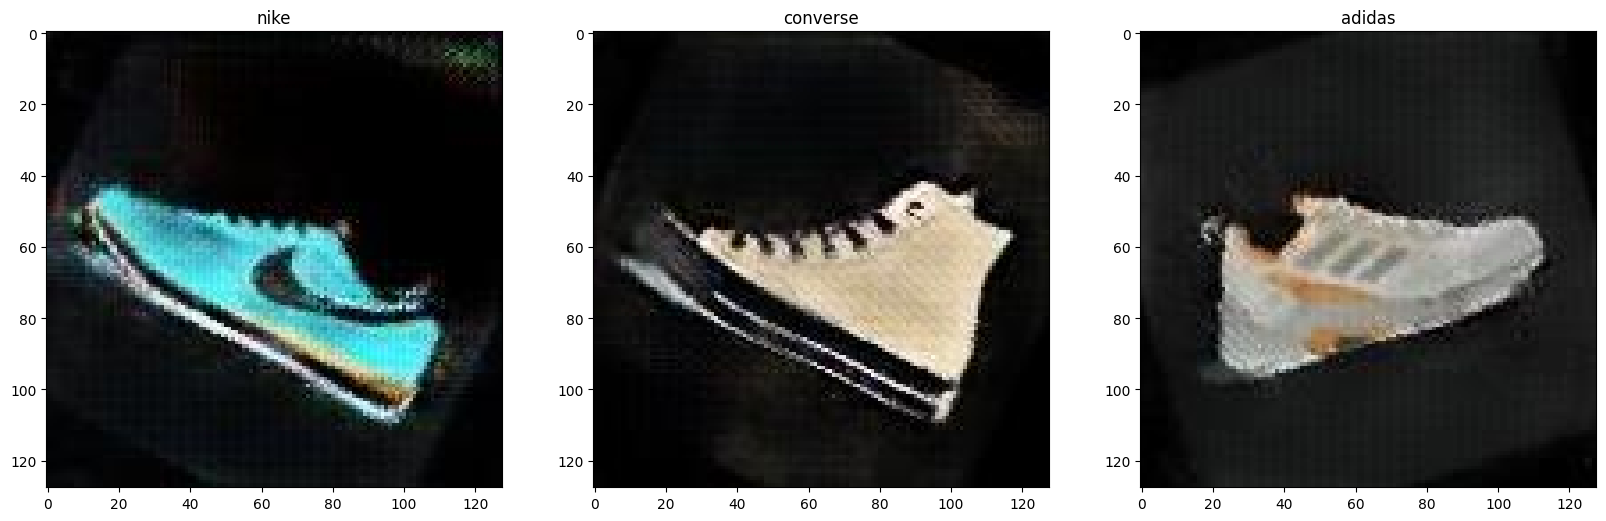

In [127]:
plt.figure(figsize=(20,20))
# Aiden, Andrew, Cathy 각 인물의 첫번째 사진 확인하기
orderNo = list(range(0,len(brand_names)*120,120))
print(orderNo)
for i in list(range(1,len(brand_names)+1)):
    plt.subplot(1,len(brand_names),i)
    plt.imshow(train[orderNo[i-1]].reshape(128,128,3))
    print(orderNo[i-1])
    plt.title(brand_names[i-1])



In [128]:
# target 생성
target = np.concatenate([np.zeros(120),np.ones(120),np.full(120,2)])

In [129]:
# data split
from sklearn.model_selection import train_test_split
train_scaled = train.reshape(-1, 128, 128, 3) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, target, test_size=0.2, random_state=42)

In [155]:
# model
model = keras.Sequential()
# 합성곱 층
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (128,128,3)))
# 풀링 층
model.add(keras.layers.MaxPooling2D(2))
# model.add(keras.layers.AveragePooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# model.add(keras.layers.AveragePooling2D(2))
# Dense 층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3,activation='softmax'))

In [156]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../ML_ImageData/best_original_cnn.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=10, validation_data=[val_scaled,val_target],callbacks=[checkpoint_cb])

Epoch 1/10
9/9 [==============================] - 2s 155ms/step - loss: 0.8534 - accuracy: 0.6840 - val_loss: 0.1561 - val_accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 1s 124ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 1s 123ms/step - loss: 2.1737e-04 - accuracy: 1.0000 - val_loss: 4.4651e-04 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 1s 131ms/step - loss: 4.5148e-05 - accuracy: 1.0000 - val_loss: 1.4281e-04 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 1s 124ms/step - loss: 8.8237e-06 - accuracy: 1.0000 - val_loss: 3.3373e-05 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 1s 121ms/step - loss: 4.4103e-06 - accuracy: 1.0000 - val_loss: 2.3173e-05 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 1s 126ms/step - loss: 3.1311e-06 - accuracy: 1.0000 - val_loss: 1.9121e-05 - v

In [157]:
best_model = keras.models.load_model("../ML_ImageData/best_original_cnn.h5")
best_model.evaluate(val_scaled,val_target)

3/3 [==============================] - 0s 21ms/step - loss: 1.6717e-05 - accuracy: 1.0000


[1.671667632763274e-05, 1.0]

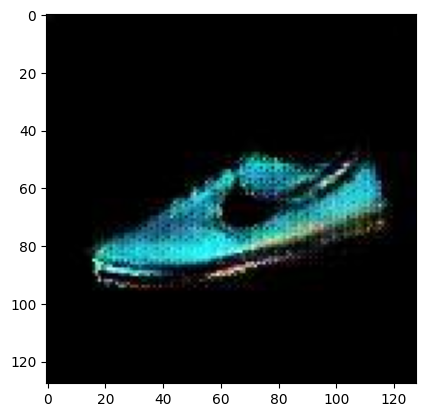

1/1 [==============================] - 0s 16ms/step
nike
adidas
[[1.0000000e+00 2.5045501e-09 7.1418376e-13]]


In [160]:
names = ['nike','converse','adidas']
plt.imshow(val_scaled[1].reshape(128,128,3))
plt.show()
preds = best_model.predict(val_scaled[1:2])
print(names[np.argmax(preds)])
print(names[np.argmin(preds)])
print(preds)

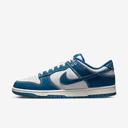

In [161]:
test = Image.open("../ML_ImageData/test_image.jpeg")
test = test.resize((128,128))
test

In [165]:
test_pred = best_model.predict(np.array(test).reshape(-1,128,128,3))
print(np.argmax(test_pred))
names[np.argmax(test_pred)]

1/1 [==============================] - 0s 15ms/step
2


'adidas'

In [166]:
# 32개의 노드로 구성된 layer 선택
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 3, 32) (32,)


In [167]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print('가중치 평균 :',conv_weights.mean(),'가중치 표준편차 :',conv_weights.std())

가중치 평균 : -0.0016000633 가중치 표준편차 : 0.08174914
